##### 해당 코드는 '딥러닝 파이토치 교과서(길벗, 2022)' 교재를 공부하며 작성한 코드입니다.
##### 이미지 출처 - https://thebook.io/

In [1]:
from IPython.display import Image

# 합성곱 신경망
- 합성곱 신경망(Convolutional Neural Network, CNN)은 합성곱층(convolutional layer)과 풀링층(pooling layer)을 포함하는 이미지 처리 성능이 좋은 인공 신경망 알고리즘
- 영상 및 사진이 포함된 이미지 데이터에서 객체를 탐색하거나 객체 위치를 찾아내는 데 유용한 신경망
- 순전파 과정에 따라 계산된 오차 정보가 신경망의 모든 노드로 전송되는 역전파 과정에서 계산 과정이 복잡하고 많은 자원을 요구하는 문제 해결
- 이미지 전체를 한 번에 계산하는 것이 아니라 이미지의 국소적 부분을 계산함으로써 시간과 자원을 절약하여 이미지의 세밀한 부분까지 분석

## 합성곱층의 필요성
- 3 x 3 흑백 이미지가 있다고 가정했을 때 이미지 분석은 3x3 배열을 펼쳐서 각 픽셀에 가중치를 곱하여 은닉층으로 전달
- 이미지를 펼쳐서 분석하면 데이터의 공간적 구조를 무시하게되어 이를 방지하기 위해 합성곱층 도입
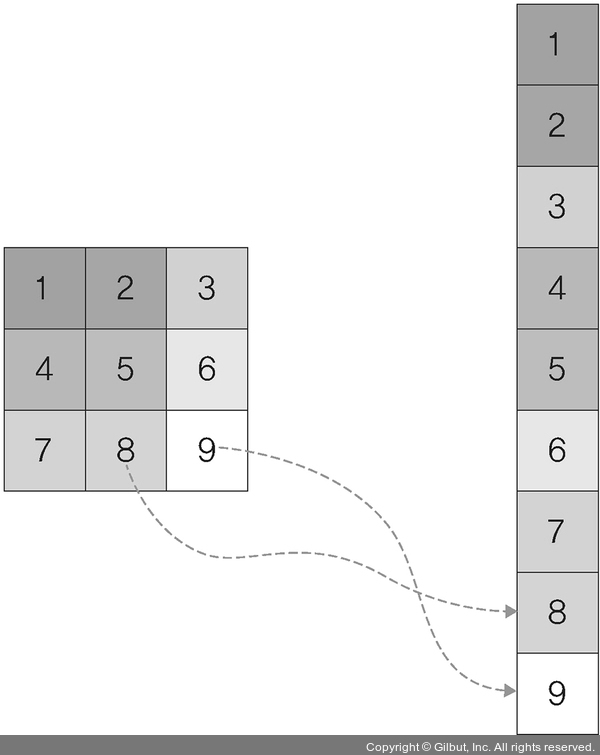

## 합성곱 신경망 구조

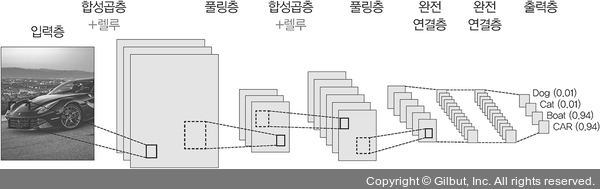

- 합성곱층과 풀링층을 거치면서 입력 이미지의 주요 특성 벡터(feature vector)를 추출
- 추출된 주요 특성 벡터들은 완전연결층을 거치면서 1차원 벡터로 변환
- 마지막으로 출력층에서 활성화 함수인 소프트맥스(softmax) 함수를 사용하여 최종 결과 출력

### 입력층(input layer)
- 이미지는 단순 1차원의 데이터가 아닌 높이(height), 너비(width), 채널(channel)의 값을 갖는 3차원 데이터
- 채널(channel)은 그레이스케일(gray scale)이면 1, 컬러(RGB)이면 3
    
### 합성곱층(convolutional layer)
- 입력 데이터에서 특성을 추출하는 역할 -> 커널(kernel) 혹은 필터(filter)를 사용
- 커널/필터는 이미지의 모든 영역을 훑으면서 특성을 추출하게 되는데, 이렇게 추출된 결과물이 특성 맵(feature map)
- 커널은 3x3, 5x5 크기로 적용되는 것이 일반적이며 스트라이드(stride)라는 지정된 간격에 따라 순차적으로 이동
    - 스트라이드(stride) : 필터를 적용하는 위치의 간격

#### 그레이스케일 이미지 합성곱(스트라이드 1)
- 이미지 크기는 (6x6x1)
- 3x3 크기의 커널/필터가 스트라이드 1 간격으로 이동하면서 합성곱 연산 수행
- 커널과 스트라이드의 상호 작용으로 (6x6x1) 크기가 (4x4x1) 크기의 특성 맵으로 줄어듬

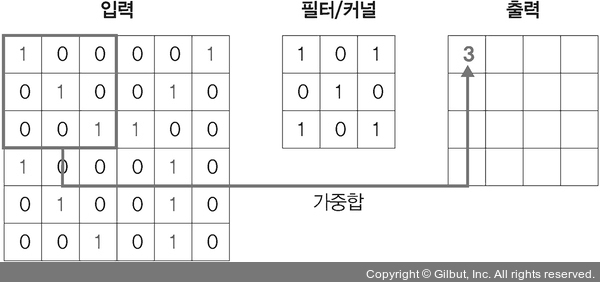
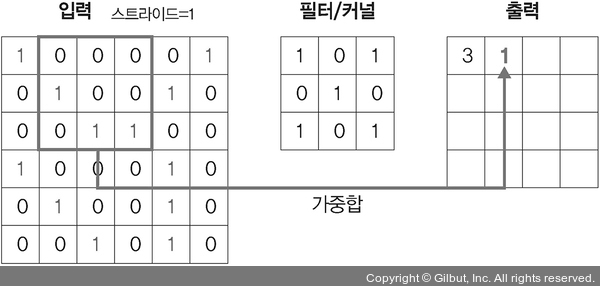
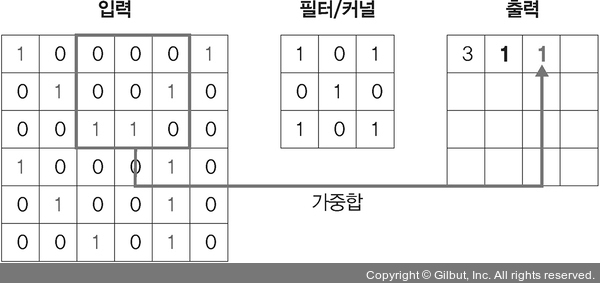
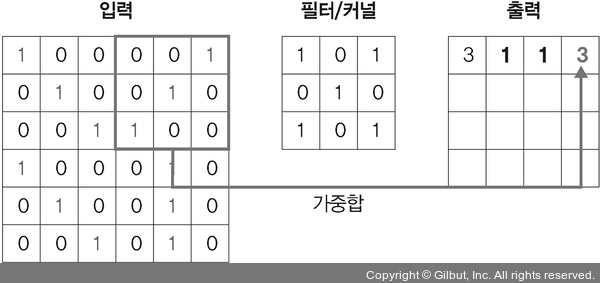
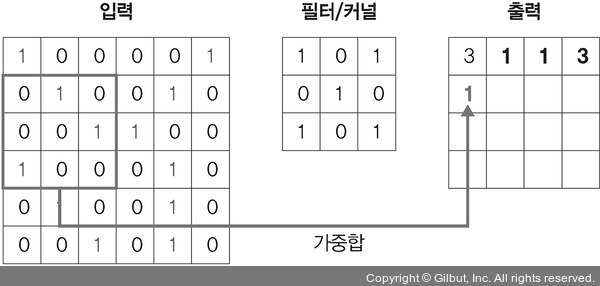
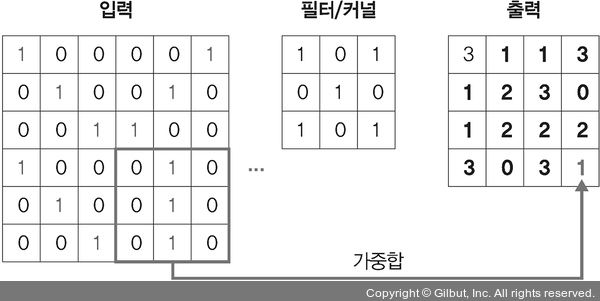

#### 컬러 이미지 합성곱
- 필터의 채널이 3
- RGB 각각에 서로 다른 가중치로 합성곱을 적용한 후 결과를 더해 줌
- 그 외 스트라이드 및 연산하는 방법은 동일
- 필터 채널이 3이어도 필터가 3개인 것이 아닌 필터 개수는 1개
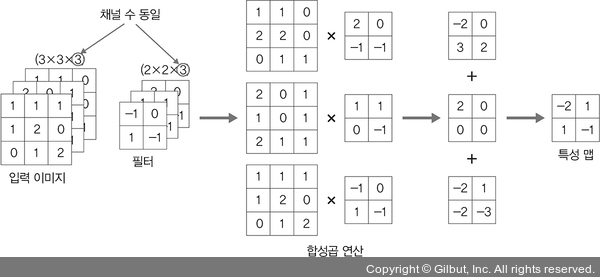

#### 필터가 2 이상인 합성곱
- 필터가 2개 이상인 경우 필터 각각은 추출 결과의 채널
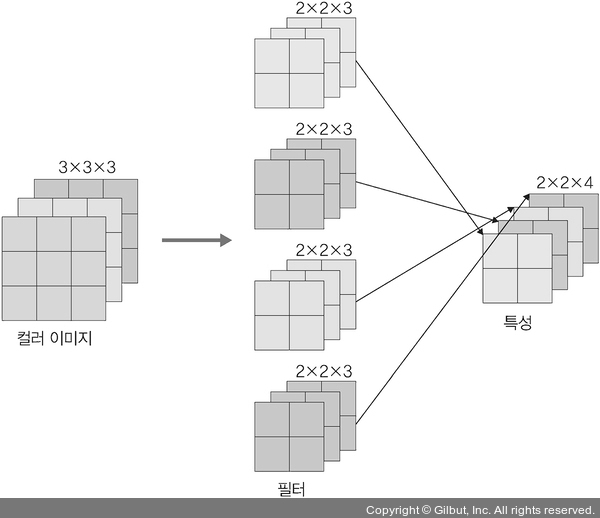

#### 합성곱층 요약
- 입력 데이터 : W1(가로), H1(세로), D1(채널 또는 깊이)
- 하이퍼 파라미터
    - 필터 개수 : K
    - 필터 크기 : F
    - 스트라이드 : S
    - 패딩 : P
- 출력 데이터
    - W2 = (W1-F+2P)/S+1
    - H2 = (H1-F+2P)/S+1
    - D2 = K

### 풀링층(pooling layer)
- 합성곱층과 유사하게 특성 맵의 차원을 다운 샘플링하여 연산량 감소
    - 다운 샘플링(sub-sampling) : 이미지를 축소
- 주요한 특성 벡터를 추출하여 학습 효과 증가
- 풀링 연산
    - 최대 풀링(max pooling) : 대상 영역에서 최댓값을 추출
    - 평균 풀링(average pooling) : 대상 영역에서 평균을 반환
    - 대부분의 합성곱 신경망에서는 최대 풀링 사용 -> 평균 풀링은 각 커널 값을 평균화시켜 중요한 가중치를 갖는 값의 특성의 희미해질 수 있음

#### 최대 풀링 연산 과정
- 평균 풀링 연산 과정도 최대 풀링과 유사한 방식으로 진행되며, 각 필터의 평균으로 계산(출력 값 : 0,3,0,1)
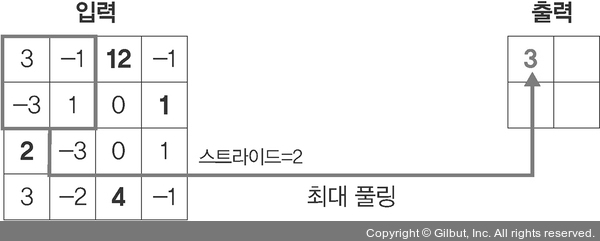
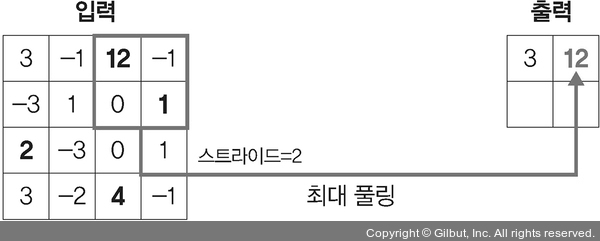
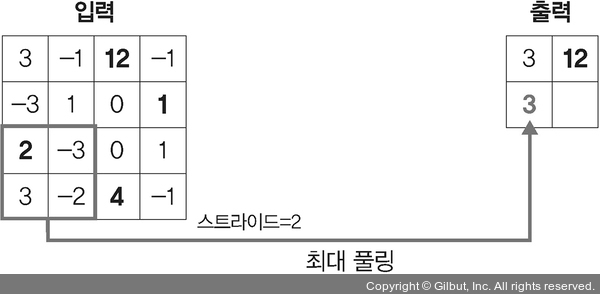
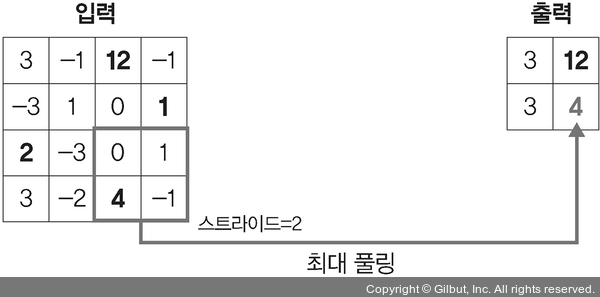

#### 최대 풀링과 평균 풀링 요약(파라미터 동일)
- 입력 데이터 : W1 x H1 x D1
- 하이퍼 파라미터
    - 필터 크기 : F
    - 스트라이드 : S
- 출력 데이터
    - W2 = (W1-F)/S+1
    - H2 = (H1-F)/S+1
    - D2 = D1

### 완전연결층(Fully Connected layer)
- 합성곱층과 풀링층을 거치면서 차원이 축소된 특성 맵을 3차원 벡터에서 1차원 벡터로 펼침(flatten)
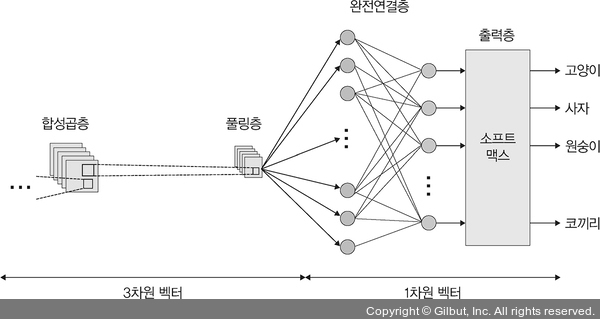

### 출력층(output layer)
- 소프트맥스 활성화 함수 사용 -> 입력받은 값을 0~1 사이의 값으로 출력
- 이미지가 각 레이블에 속할 확률 값이 출력 -> 가장 높은 확률 값을 갖는 레이블이 최종 값으로 선정

## 1D, 2D, 3D 합성곱
### 1D 합성곱
- 필터가 시간을 축으로 좌우로만 이동할 수 있는 합성곱
- 입력(W, 너비(Width))과 필터(k x k(높이x너비))에 대한 출력은 W(너비, Width)
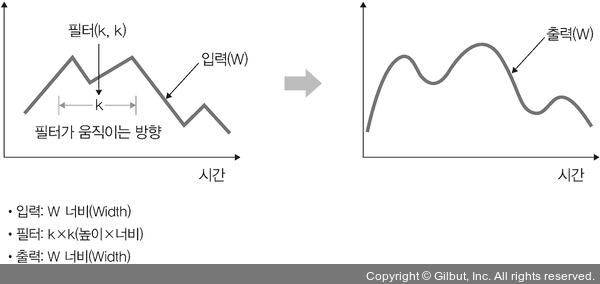

### 2D 합성곱
- 필터가 방향 두 개로 움직이는 형태
- 입력(W,H)과 필터(k,k)에 대한 출력은 (W,H)의 2D 행렬
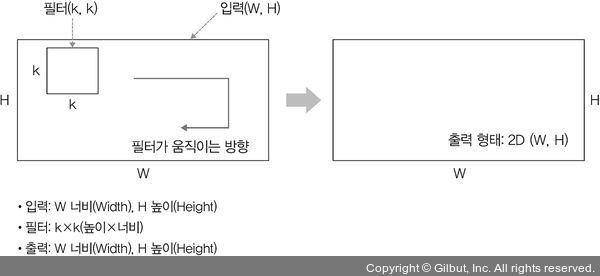

### 3D 합성곱
- 필터가 방향 세 개로 움직이는 형태
- 입력(W, H, L)과 필터(k,k,d)에 대한 출력은 (W, H, L)의 3D 형태
- d < L을 유지하는 것이 중요
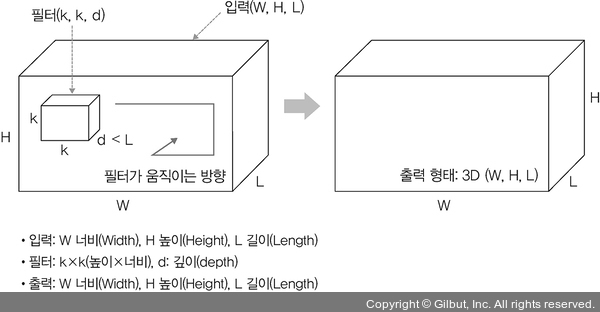

### 3D 입력을 갖는 2D 합성곱
- 입력이 (224x224x3, 112x112x32)와 같은 3D 형태임에도 출력 형태가 3D가 아닌 2D 행렬을 취하는 것
- 필터에 대한 길이(L)가 입력 채널의 길이(L)와 같음
- 입력(W,H,L)에 필터 (k,k,L)를 적용하면 출력은 (W,H)
- LeNet-5, VGG 등
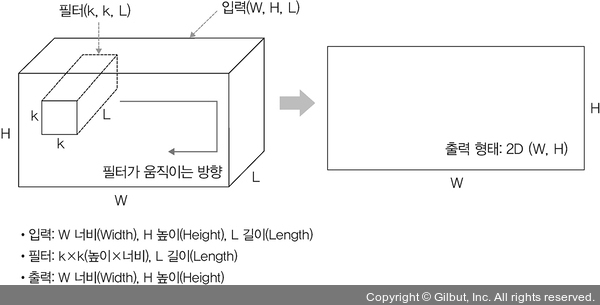

### 1x1 합성곱
- 입력(W,H,L)에 필터(1,1,L)를 적용하면 출력은(W,H)
- 채널 수를 조정해서 연산량이 감소되는 효과
- GoogleNet
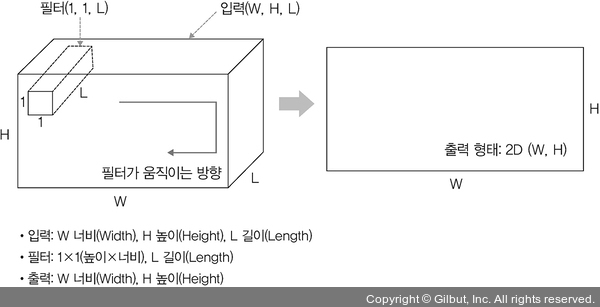

# 합성곱 신경망 파이토치 구현
- fashion_mnist 데이터셋을 사용하여 합성곱 신경망을 구현

In [39]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

In [40]:
# GPU 설정
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [41]:
# fashion_mnist 데이터셋로드 
train_dataset  = torchvision.datasets.FashionMNIST("../chap05/data", download=True, 
                                                   transform = transforms.Compose([transforms.ToTensor()]))
test_dataset  = torchvision.datasets.FashionMNIST("../chap05/data", download=True, train=False, 
                                                  transform = transforms.Compose([transforms.ToTensor()])) 

In [42]:
# 데이터로더에 전달
train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=100)
test_loader = torch.utils.data.DataLoader(test_dataset, 
                                           batch_size=100)

In [61]:
train_dataset[0][0].size()

torch.Size([1, 28, 28])

- 100개 단위로 데이터를 묶어서 불러옴
- 이미지의 크기는 (1 x 28 x 28)

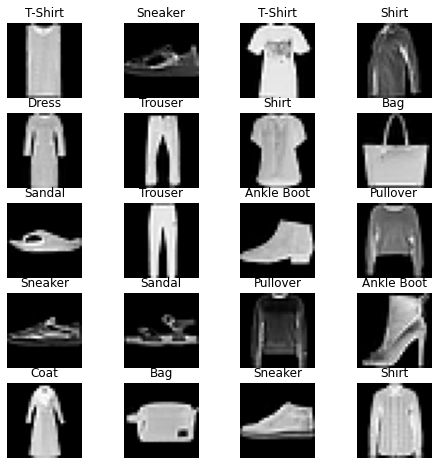

In [6]:
# 분류에 사용될 클래스 정의
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'}

fig = plt.figure(figsize=(8,8));
columns = 4;
rows = 5;
for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(train_dataset));
    img = train_dataset[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[train_dataset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

In [8]:
# 심층 신경망 모델 생성(합성곱 신경망과 비교)
class FashionDNN(nn.Module):
    def __init__(self):
        super(FashionDNN, self).__init__()
        self.fc1 = nn.Linear(in_features=784, out_features=256)
        self.drop = nn.Dropout(0.25)
        self.fc2 = nn.Linear(in_features=256, out_features=128)
        self.fc3 = nn.Linear(in_features=128, out_features=10)
        
    def forward(self, input_data):
        out = input_data.view(-1, 784)
        out = F.relu(self.fc1(out))
        out = self.drop(out)
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

- class 형태의 모델은 항상 torch.nn.Module을 상속받음
- init()은 객체가 갖는 속성 값을 초기화하는 역할 -> 객체가 생성될때 자동으로 호출 
- super(FashionDNN, self).__init__()은 Fashion DNN이라는 부모(super) 클래스를 상속받겠다는 의미
- nn.Linear() : 단순 선형 회귀
    - in_features : 입력의 크기(input size). 실제 데이터 연산이 진행되는 forward() 부분에 전달
    - out_features : 출력의 크기(output size). forward() 연산의 결과 크기
- torch.nn.Dropout(p) : p만큼의 비율로 텐서의 값이 0이 되고, 0이 되지 않는 값들은 기존 값에 (1/(1-p))만큼 곱해져 커짐
- forward() : 모델이 학습 데이터를 입력받아서 순전파(forward propagation) 학습을 진행
    - 반드시 이름은 forward여야 함
    - 모델이 학습 데이터를 입력받아 순전파 연산을 진행하는 함수 -> 객체를 데이터와 함께 호출하면 자동으로 실행
- 파이토치의 view()는 넘파이의 reshape과 같은 역할 -> 텐서의 크기를 변경

In [10]:
# 심층 신경망에서 필요한 파라미터 정의
learning_rate = 0.001
model = FashionDNN()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionDNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [14]:
# 심층 신경망을 이용해 모델 학습
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)
        
        outputs = model(train)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count += 1
        
        if not (count % 50):
            total = 0
            correct = 0
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
                test = Variable(images.view(100,1,28,28))
                outputs = model(test)
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
                total += len(labels)
                
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            
        if not (count % 500):
            print("Iteration : {}, Loss : {}, Accuracy : {}%".format(count, loss.data, accuracy))

Iteration : 500, Loss : 0.5959805846214294, Accuracy : 83.6199951171875%
Iteration : 1000, Loss : 0.4895753860473633, Accuracy : 84.73999786376953%
Iteration : 1500, Loss : 0.34336578845977783, Accuracy : 84.69999694824219%
Iteration : 2000, Loss : 0.3523952066898346, Accuracy : 86.08999633789062%
Iteration : 2500, Loss : 0.24644781649112701, Accuracy : 86.54000091552734%
Iteration : 3000, Loss : 0.2771877944469452, Accuracy : 86.83999633789062%


- 모델과 데이터는 동일한 장치(CPU 또는 GPU)에 있어야 함
    - CPU에서 처리된 데이터를GPU 모델에 적용하거나 그 반대의 경우 런타임 오류 발생 
- Autograd : Variable을 사용해 역전파를 위한 미분 값을 자동으로 계산

In [33]:
# 합성곱 네트워크 생성
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10) # 마지막 계층의 out_features는 클래스 개수를 의미
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out

In [34]:
model = FashionCNN().cuda()
print(model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


##### nn.Sequential()
- init()에서 사용할 네트워크 모델들을 정의
- forward() 함수에서 구현될 순전파를 layer 형태로 가독성이 뛰어난 코드로 작성 가능
- 계층을 차례로 쌓을 수 있도록 Wx+b와 같은 수식과 활성화 함수를 연결해 주는 역할
- 데이터가 각 계층을 순차적으로 지나갈 때 사용하면 좋은 방법

##### Conv2d
- 합성곱이란 커널이라는 n x m 크기의 행렬이 높이(height) x 너비(width) 크기의 이미지를 처음부터 끝까지 훑으면서 각원소 값끼리 곱한 후 모두 더한 값을 출력
- 커널은 일반적으로 3x3이나 5x5를 사용
- 파라미터
    - in_channels : 입력 채널의 수 -> 흑백 이미지는 1, RGB 값을 가진 이미지는 3인 경우가 많음
    - out_channels : 출력 채널의 수
    - kernel_size : 커널 크기
        - 커널은 이미지 특징을 찾아내기 위한 공용 파라미터
        - 커널은 입력 데이터를 스트라이드 간격으로 순회하면서 합성곱을 계산
        - kernel_size=3이면, 커널의 크기는 (3,3)
    - padding : 패딩 크기
        - 출력 크기를 조정하기 위해 입력 데이터 주위에 0을 채움
        - 패딩 값이 클수록 출력 크기도 커짐
- 출력 크기 구하는 공식 : ((W-F+2P)/S)+1
    - W : 입력 데이터의 크기(input_volume_size)
    - F : 커널 크기(kernel_size)
    - P : 패딩 크기(padding_size)
    - S : 스트라이드(Stride)
    
##### BatchNorm2d
- 학습 과정에서 각 배치 단위별로 데이터가 다양한 분포를 가지더라도 평균과 분산을 이용하여 정규화
- 아래 그림을 보면 배치 단위나 계층에 따라 입력 값의 분포가 모두 다르지만 정규화를 통해 분포를 가우시안 형태로 구성
    - 평균은 0, 표준편차는 1로 데이터의 분포가 조정
    
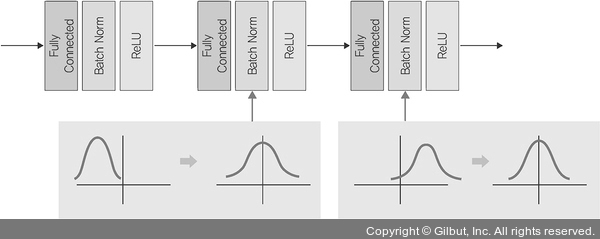

##### MaxPool2d
- 이미지 크기를 축소
- 풀링 계층은 합성곱층의 출력 데이터를 입력으로 받아서 출력 데이터(activation map)의 크기를 줄이거나, 특정 데이터를 강조하는 용도로 사용
    - 최대 풀링(max pooling)
    - 평균 풀링(averasge pooling)
    - 최소 풀링(min pooling)
- 파라미터
    - kernel_size : m x n 행렬로 구성된 가중치
    - stride : 입력 데이터에 커널을 적용할 때 이동 간격
        - 스트라이드 값이 커지면 출력 크기는 작아짐
- 출력 크기 계산 공식 : IF/F
    - IF : 입력 필터의 크기(input_filter_size)
        - 바로 앞의 Conv2d의 출력 크기
    - F : 커널 크기(kernel_size)
    
##### Fully Connected
- 합성곱 층에서 완전연결층으로 변경되기 때문에 데이터의 형태를 1차원으로 변환
- 클래스를 분류하기 위해서는 이미지 형태의 데이터를 배열 형태로 변환하여 작업
- Conv2d에서 사용하는 하이퍼 파라미터 값들에 따라 출력 크기(output size)가 달라짐
    - 패딩, 스트라이드의 값에 따라 출력 크기가 달라짐
- 줄어든 출력 크기는 최종적으로 분류를 담당하는 완전 연결층(fully connected layer)로 전달

In [69]:
from torchsummary import summary
summary(model, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
       BatchNorm2d-2           [-1, 32, 28, 28]              64
              ReLU-3           [-1, 32, 28, 28]               0
         MaxPool2d-4           [-1, 32, 14, 14]               0
            Conv2d-5           [-1, 64, 12, 12]          18,496
       BatchNorm2d-6           [-1, 64, 12, 12]             128
              ReLU-7           [-1, 64, 12, 12]               0
         MaxPool2d-8             [-1, 64, 6, 6]               0
            Linear-9                  [-1, 600]       1,383,000
        Dropout2d-10                  [-1, 600]               0
           Linear-11                  [-1, 120]          72,120
           Linear-12                   [-1, 10]           1,210
Total params: 1,475,338
Trainable params: 1,475,338
Non-trainable params: 0
---------------------------

- images shape : (1,28,28) -> (32,28,28) -> (32,14,14) -> (64,12,12) -> (64,6,6) -> (600) -> (120) -> (10)

In [71]:
# 합성곱 네트워크를 위한 파라미터 정의
learning_rate = 0.01
model = FashionCNN()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [72]:
# 모델 학습 및 성능 평가
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
    
        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)
        
        outputs = model(train)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count += 1
    
        if not (count % 50):    
            total = 0
            correct = 0        
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)            
                test = Variable(images.view(100, 1, 28, 28))            
                outputs = model(test)            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()            
                total += len(labels)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500, Loss: 0.49644365906715393, Accuracy: 84.90999603271484%
Iteration: 1000, Loss: 0.36838188767433167, Accuracy: 87.29999542236328%
Iteration: 1500, Loss: 0.40892210602760315, Accuracy: 86.7699966430664%
Iteration: 2000, Loss: 0.2862316966056824, Accuracy: 88.04000091552734%
Iteration: 2500, Loss: 0.17212752997875214, Accuracy: 88.95999908447266%
Iteration: 3000, Loss: 0.18720754981040955, Accuracy: 88.4000015258789%
